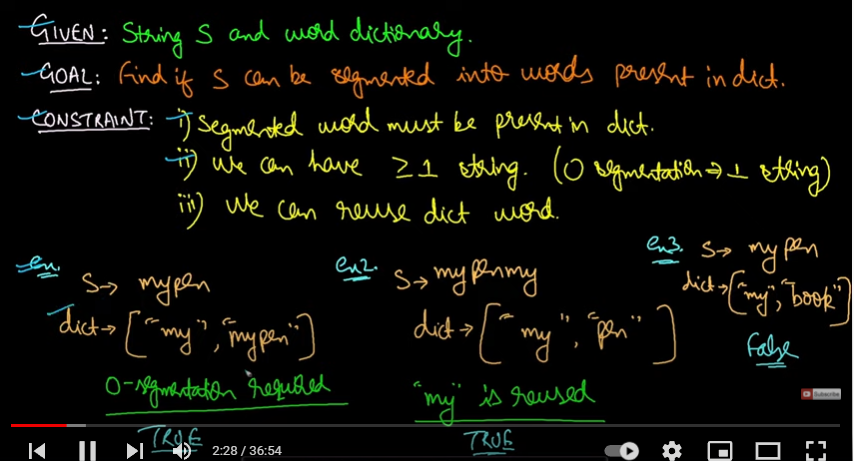

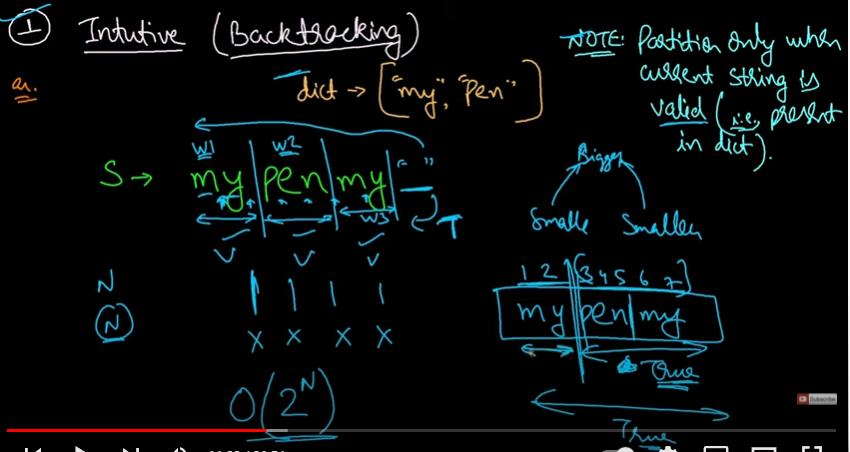

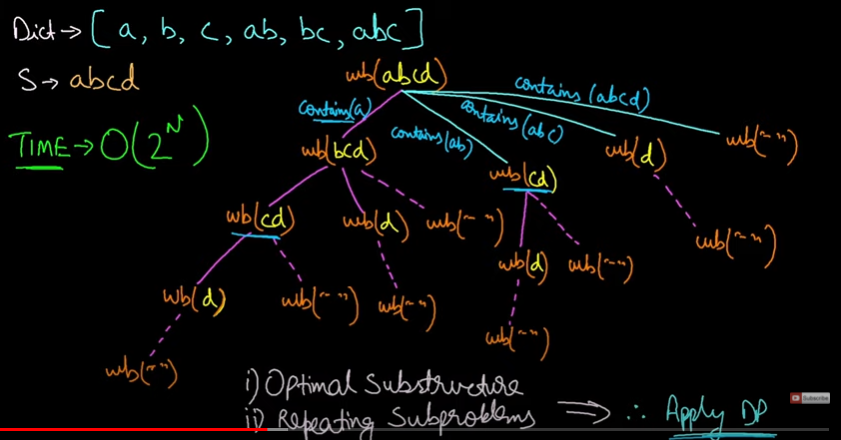

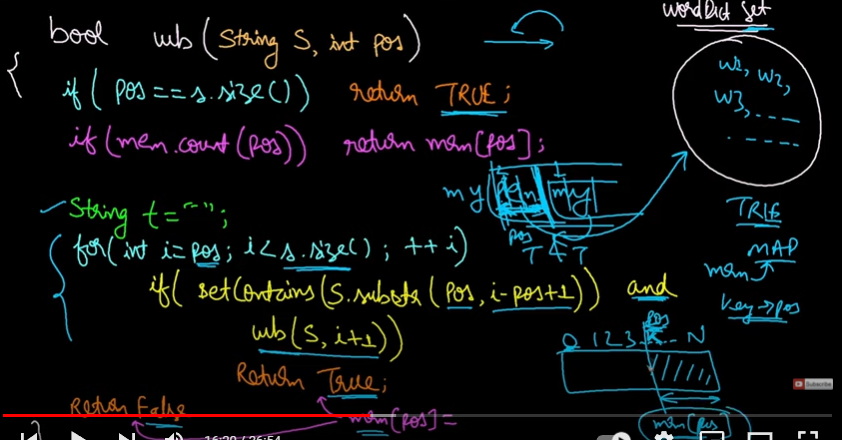

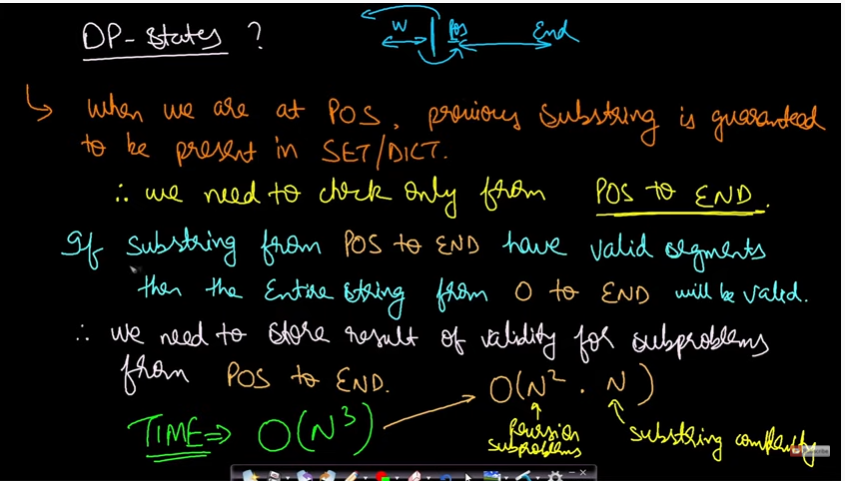

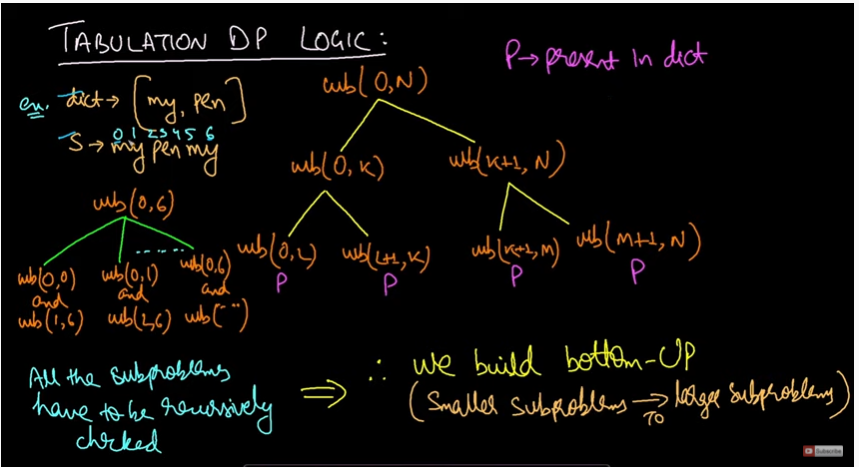

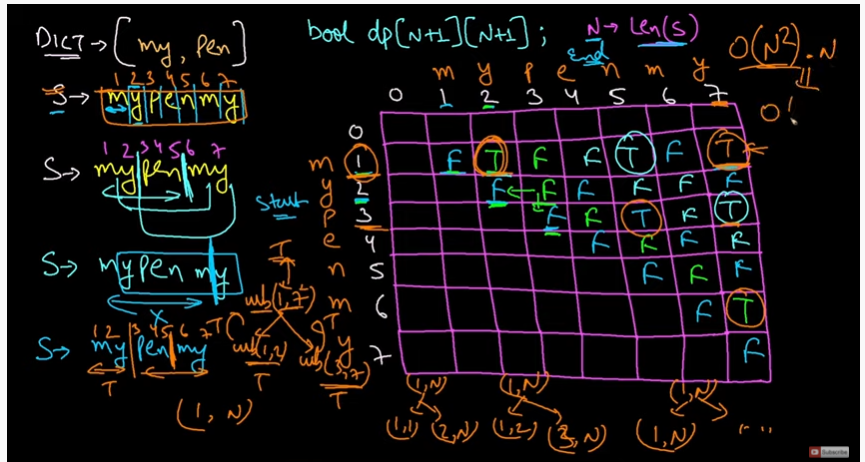

In [14]:
def wordBreak111(words, word, out=''):
    if not word:
        print(out)
        return
    
    for i in range( len(word) ):
        prefix = word[:i+1]
        if prefix in words:
            wordBreak111(words, word[i+1:], out +" "+prefix if out else out+prefix)

words = [
        'self', 'th', 'is', 'famous', 'Word', 'break', 'b', 'r',
        'e', 'a', 'k', 'br', 'bre', 'brea', 'ak', 'problem'
    ]
 
# input string
word = 'Wordbreakproblem'

wordBreak111(words, word)

Word b r e a k problem
Word b r e ak problem
Word br e a k problem
Word br e ak problem
Word bre a k problem
Word bre ak problem
Word brea k problem
Word break problem


In [7]:
def wordBreak(words, word ):
    if not word: return True
    
    for i in range(1, len(word) ):
        if word[:i] and wordBreak(words, word[i:] ):
            return True
    return False

In [8]:
words = [
        'self', 'th', 'is', 'famous', 'Word', 'break', 'b', 'r',
        'e', 'a', 'k', 'br', 'bre', 'brea', 'ak', 'problem'
    ]
 
    # input string
word = 'Wordbreakproblem'
print(wordBreak(words, word ))

False


#memoization

In [80]:
def wordBreak_mem( s: str, wordDict: list([str]) ) -> bool:
        mem= {}
        n = len(s)
        def dfs( pos) :
            if pos in mem : return mem[pos]

            if pos == n : return True

            mem[pos] = False
            for i in range(pos+1, n+1):
                if s[ pos : i] in wordDict and dfs( i ) :
                    mem[pos] = True
                    return mem[pos]
            return mem[pos]
        return dfs(  0 )

In [81]:
words_dict = [
        'self', 'th', 'is', 'famous', 'Word', 'break', 'b', 'r',
        'e', 'a', 'k', 'br', 'bre', 'brea', 'ak', 'problem'
    ]
 
    # input string
# word = 'Wordbreakproblem'
word = 'Word'
print(wordBreak_mem( word , words_dict))

True


In [86]:
def wordBreak_dp1( s: str, wordDict: list([str]) ) -> bool:
    
    dp = [False]*(len(s)+1)
    dp[-1] = True #dp[len(s)] = True
    
    for i in range(len(s)-1,-1,-1):
        for w in wordDict:
            if (i+len(w)) <= len(s) and s[i:i+len(w)] ==w:
                dp[i] = dp[i+len(w)]
                
            if dp[i]:
                break
    return dp[0]

In [89]:
def wordBreak_dp11( s: str, wordDict) -> bool:
        dp = [False]*(len(s)+1)
        dp[-1] = True #dp[len(s)] = True
        n = len(s)
        for i in range(n-1,-1,-1):
            for w in wordDict:
                ext = i+len(w)
                if ext <= n and s[i: ext] == w:
                    dp[i] = dp[ext]

                if dp[i]:
                    break
        return dp[0]

In [90]:
words_dict = [
        'self', 'th', 'is', 'famous', 'Word', 'break', 'b', 'r',
        'e', 'a', 'k', 'br', 'bre', 'brea', 'ak', 'problem'
    ]
 
    # input string
# word = 'Wordbreakproblem'
word = 'Word'
print(wordBreak_dp1( word , words_dict))

True


In [130]:
def wordBreak_dp2( s: str, wordDict) -> bool:
    n = len(s)
    dp = [[False]*(n+1) for _ in range(n+1) ]
    
    for g in range(1, n+1):
        for i in range(1, n+1-g+1):
            j = i+g-1
            for k in range( i, j+1):
                if (dp[i][k] and dp[k+1][j] ) or s[i-1:j ] in wordDict:
                    dp[i][j]= True
                    break

    return dp[1][n]
            

word = 'mypenmy'
words_dict = ['my','pen']
print(wordBreak_dp2( word , words_dict))

# word = "catsandog"
# words_dict = ["cats","dog","sand","and","cat"]
# print(wordBreak_dp2( word , words_dict))

True
